### Student Information
Name: 葉喬暐 Chiao Wei Yeh

Student ID: 105033551

---

# 1.Data Preparation

In [5]:
cd C:\Users\icmems\Desktop\surveyy\hw1\data_mining_hw_1-master

C:\Users\icmems\Desktop\surveyy\hw1\data_mining_hw_1-master


In [6]:
pwd

'C:\\Users\\icmems\\Desktop\\surveyy\\hw1\\data_mining_hw_1-master'

In [7]:
ls

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  8229-9EF4

 C:\Users\icmems\Desktop\surveyy\hw1\data_mining_hw_1-master 的目錄

2017/10/15  上午 11:22    <DIR>          .
2017/10/15  上午 11:22    <DIR>          ..
2017/09/30  上午 12:32                33 .gitignore
2017/10/15  下午 02:45    <DIR>          helpers
2017/09/30  上午 12:32             2,723 hw_1.ipynb
2017/10/15  上午 11:22             2,887 README.md
               3 個檔案           5,643 位元組
               3 個目錄  46,548,865,024 位元組可用


In [4]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math

In [8]:
# helper functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

## Load raw data

In [11]:
cd C:\Users\icmems\Desktop\surveyy\hw1\sentiment labelled sentences\sentiment labelled sentences

C:\Users\icmems\Desktop\surveyy\hw1\sentiment labelled sentences\sentiment labelled sentences


In [12]:
amazon=pd.read_table("amazon_cells_labelled.txt",header=None)
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [13]:
imdb=pd.read_table("imdb_labelled.txt",header=None)
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [33]:
yelp=pd.read_table("yelp_labelled.txt",header=None)
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [36]:
#length of each sentence data
print('length of amazon data:',len(amazon))
print('length of imdb data:',len(imdb))
print('length of yelp data:',len(yelp))
print('\n')
print('total length of data',len(amazon)+len(imdb)+len(yelp))

length of amazon data: 1000
length of imdb data: 748
length of yelp data: 1000


total length of data 2748


### I see some problem here, the imdb data's number are 748, but it have to be 1000
### so I fixed that by :
>  file=open("sentiment labelled sentences/imdb_labelled.txt", "r")
>  lines = file.readlines()
>  len(lines)

### from slack's post
### Thanks to Elvis~
 

In [56]:
cd C:\Users\icmems\Desktop\surveyy\hw1\sentiment labelled sentences\sentiment labelled sentences

C:\Users\icmems\Desktop\surveyy\hw1\sentiment labelled sentences\sentiment labelled sentences


In [15]:
with open("imdb_labelled.txt", mode='r',encoding = 'utf-8-sig') as imdbb:
    lines = imdbb.read().split('\n')
lines

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0',
 'Very little music or anything to speak of.  \t0',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0",
 'Wasted two hours.  \t0',
 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1',
 'A bit predictable.  \t0',
 'Loved the casting of Jimmy Buffet as the science teacher.  \t1',
 'And those baby owls were adorable.  \t1',
 "The movie showed a lot of Florida at it's best, made it l

In [16]:
line = [line.split("\t") for line in lines if len(line.split("\t"))==2 and line.split("\t")[1]!='']

In [17]:
line

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0'],
 ['Very little music or anything to speak of.  ', '0'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  '1'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  '0'],
 ['Wasted two hours.  ', '0'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  '1'],
 ['A bit predictable.  ', '0'],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', '1'],
 ['And those baby owls were adorable.  ', '1'],
 ["

### Note: have some datatype problem ,which cause result error after sampling during data preprocessing
### so I change all of dataframe's label to "int" for making sure that all datatype about label are the same. 

In [18]:
%%timeit
for i in range(len(line)):
    line[i][1]=int(line[i][1])

264 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
print(type(line[0][1]))
print(type(int(line[0][1])))

<class 'int'>
<class 'int'>


In [20]:
line

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  0],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  0],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  0],
 ['Very little music or anything to speak of.  ', 0],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  1],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  0],
 ['Wasted two hours.  ', 0],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  1],
 ['A bit predictable.  ', 0],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', 1],
 ['And those baby owls were adorable.  ', 1],
 ["The movie showed a lot

In [21]:
imdb=line
len(imdb)

1000

In [22]:
imdb

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  0],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  0],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  0],
 ['Very little music or anything to speak of.  ', 0],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  1],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  0],
 ['Wasted two hours.  ', 0],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  1],
 ['A bit predictable.  ', 0],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', 1],
 ['And those baby owls were adorable.  ', 1],
 ["The movie showed a lot

In [23]:
lines[-1]

''

In [24]:
len(lines[:-1])

1000

In [25]:
#seems not so pretty
imdb

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  0],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  0],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  0],
 ['Very little music or anything to speak of.  ', 0],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
  1],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
  0],
 ['Wasted two hours.  ', 0],
 ['Saw the movie today and thought it was a good effort, good messages for kids.  ',
  1],
 ['A bit predictable.  ', 0],
 ['Loved the casting of Jimmy Buffet as the science teacher.  ', 1],
 ['And those baby owls were adorable.  ', 1],
 ["The movie showed a lot

In [26]:
print('1\t1')
print(len('\t'))

1	1
1


In [127]:
print(" ".join(imdb))

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
 Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
 Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
 Very little music or anything to speak of.  	0
 The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
 The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
 Wasted two hours.  	0
 Saw the movie today and thought it was a good effort, good messages for kids.  	1
 A bit predictable.  	0
 Loved the casting of Jimmy Buffet as the science teacher.  	1
 And those baby owls were adorable.  	1
 The movie showed a lot of Florida at it's best, made it look very appealing.  	1
 The Songs Were The Be

In [94]:
print(" ".join(imdb))

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
 Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
 Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
 Very little music or anything to speak of.  	0
 The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
 The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
 Wasted two hours.  	0
 Saw the movie today and thought it was a good effort, good messages for kids.  	1
 A bit predictable.  	0
 Loved the casting of Jimmy Buffet as the science teacher.  	1
 And those baby owls were adorable.  	1
 The movie showed a lot of Florida at it's best, made it look very appealing.  	1
 The Songs Were The Be

In [27]:
pd.DataFrame(imdb)

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [34]:
yelp.columns=['sentance','label']

In [149]:
print(len(yelp))
yelp

1000


,sentance,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [29]:
imdb=pd.DataFrame(imdb)
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [30]:
imdb.columns=['sentance','label']
imdb

,sentance,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [31]:
amazon.columns=['sentance','label']
amazon

,sentance,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [35]:
df=pd.concat([amazon,imdb,yelp],axis=0)
df

,sentance,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [36]:
df.reset_index(inplace=True)

In [37]:
del df['index']

In [38]:
df

,sentance,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## Split data into sentences and label

In [39]:
#sentences
sentences=pd.concat([amazon.ix[:,0],imdb.ix[:,0],yelp.ix[:,0]],axis=0)
sentences

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
7            If you are Razr owner...you must have this!
8                    Needless to say, I wasted my money.
9                       What a waste of money and time!.
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
12     If the two were seperated by a mere 5+ ft I st...
13                              Very good quality though
14     The design is very odd, as the ear "clip" is n...
15     Highly recommend for any one who has a blue to...
16                   I advise EVERYONE DO NOT BE FOOLED!
17                             

In [40]:
#length of sentences
len(sentences)

3000

In [41]:
#label
label=pd.concat([amazon.ix[:,1],imdb.ix[:,1],yelp.ix[:,1]],axis=0)
label

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 3000, dtype: int64

In [42]:
len(label)

3000

## Check missing value

In [43]:
df.isnull().sum()

sentance    0
label       0
dtype: int64

In [44]:
df.isnull().sum()

sentance    0
label       0
dtype: int64

In [45]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentance    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
dtype: object

## Check duplicate value

In [47]:
df.duplicated().sum()

17

In [48]:
df.duplicated(subset='sentance').sum()

17

In [49]:
df.index

RangeIndex(start=0, stop=3000, step=1)

In [50]:
type(df.duplicated(subset='sentance'))

pandas.core.series.Series

In [51]:
dup=[]
for ind in df.index:
    if df.duplicated(subset='sentance')[ind]==True:
        dup.append(ind)
        print(ind)
print('sum',len(dup))

285
407
524
543
744
748
778
792
892
896
1363
1585
1788
2814
2816
2843
2846
sum 17


In [53]:
# datafame's number with and without duplicate are the same 
dup=[]
for ind in df.index:
    if df.duplicated()[ind]==True:
        dup.append(ind)
        print(ind)
print('sum',len(dup))

285
407
524
543
744
748
778
792
892
896
1363
1585
1788
2814
2816
2843
2846
sum 17


In [54]:
for ind in dup:
    print(df.ix[ind],'\n')

sentance    Great phone!.
label                   1
Name: 285, dtype: object 

sentance    Works great.
label                  1
Name: 407, dtype: object 

sentance    Works great!.
label                   1
Name: 524, dtype: object 

sentance    Don't buy this product.
label                             0
Name: 543, dtype: object 

sentance    If you like a loud buzzing to override all you...
label                                                       0
Name: 744, dtype: object 

sentance    Does not fit.
label                   0
Name: 748, dtype: object 

sentance    This is a great deal.
label                           1
Name: 778, dtype: object 

sentance    Great Phone.
label                  1
Name: 792, dtype: object 

sentance    Excellent product for the price.
label                                      1
Name: 892, dtype: object 

sentance    Great phone.
label                  1
Name: 896, dtype: object 

sentance    Definitely worth checking out.  
label                    

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



### Why I do this: bcz I think even though this dataset have duplicate sentence, maybe its label may different !
### so I wanna figure out

In [55]:
for ind in df.index:
    if df['sentance'].ix[ind]=='Great phone!.':
        print(ind,'\n')

print(df.ix[187])
print(df.ix[285])

for ind in df.index:
    if df['sentance'].ix[ind]=='Works great.':
        print(ind,'\n')

print(df.ix[262])
print(df.ix[407])

for ind in df.index:
    if df['sentance'].ix[ind]== 'Don\'t buy this product.':
        print(ind,'\n')

print(df.ix[180])
print(df.ix[543])

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



187 

285 

sentance    Great phone!.
label                   1
Name: 187, dtype: object
sentance    Great phone!.
label                   1
Name: 285, dtype: object
262 

407 

sentance    Works great.
label                  1
Name: 262, dtype: object
sentance    Works great.
label                  1
Name: 407, dtype: object
180 

543 

sentance    Don't buy this product.
label                             0
Name: 180, dtype: object
sentance    Don't buy this product.
label                             0
Name: 543, dtype: object


In [56]:
#drop duplicate

#before drop
print(len(df))
#after drop
df_dup = df.drop_duplicates()
print(len(df_dup))

3000
2983


## Data preprocessing

In [57]:
#sampling

#by number
df_dup.sample(n=10)
print('length :',len(df_dup.sample(n=10)))

length : 10


In [58]:
#by propotion
df_dup.sample(frac=0.01)

,sentance,label
333,"It fits comfortably in either ear, the sound i...",1
1867,Great movie!,1
924,Works good.,1
2104,This is one of the better buffets that I have ...,1
1320,This is actually a very smart movie.,1
1040,The very idea of it was lame - take a minor ch...,0
2848,"To my disbelief, each dish qualified as the wo...",0
1471,At no point in the proceedings does it look re...,0
1902,"As for the killer, don't expect anything origi...",0
1441,But the convoluted plot just didn't convince m...,0


In [59]:
df_sample=df_dup.sample(n=10)
df_sample

,sentance,label
720,"Good value, works fine - power via USB, car, o...",1
2558,All of the tapas dishes were delicious!,1
685,Easy to pair with my Samsung Cell.,1
2378,RUDE & INCONSIDERATE MANAGEMENT.,0
2671,I promise they won't disappoint.,1
741,"Couldn't use the unit with sunglasses, not goo...",0
601,"The real killer is the volume, and of course i...",0
2520,"Oh this is such a thing of beauty, this restau...",1
335,1. long lasting battery (you don't have to rec...,0
1049,"The film succeeds despite, or perhaps because ...",1


In [60]:
df_sample.label.value_counts()#.plot(kind="bar", rot=0)

1    6
0    4
Name: label, dtype: int64

In [307]:
#some data type aren't right

#problem come from imdb dataset
df_sample.label.tolist()

[0, 1, 1, 1, 0, 1, 1, 1, 0, 0]

### Important! note that some of keys are "string" and some are "number",which will cause anylsis problems

In [269]:
ta.get_tokens_and_frequency(list(df_sample.label))

(odict_keys(['0', 0, 1, '1']), odict_values([5, 2, 2, 1]))

### after dealing with

In [61]:
import matplotlib.pyplot as plt

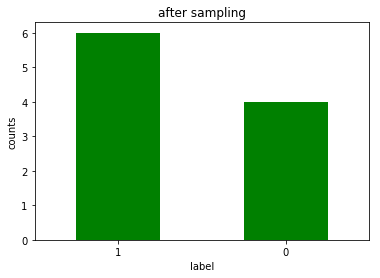

In [62]:
plt.figure()
df_sample.label.value_counts().plot(kind="bar", rot=0,color='g')
plt.xlabel('label')
plt.ylabel('counts')
plt.title('after sampling')

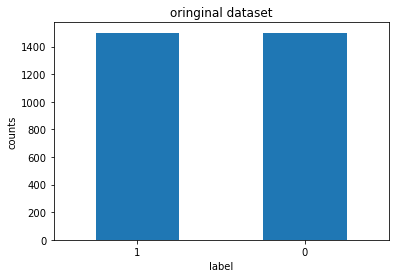

In [63]:
# oringinal dataset
df.label.value_counts().plot(kind="bar", rot=0)
plt.xlabel('label')
plt.ylabel('counts')
plt.title('oringinal dataset')

## Feature Creation

In [64]:
import nltk

In [65]:
#some nltk library is missing, so download it
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [66]:
%%timeit
df_dup['unigrams'] = df_dup['sentance'].apply(lambda x: dmh.tokenize_text(x))

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



706 ms ± 9.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
df_dup

,sentance,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]"


In [68]:
df_dup.isnull().sum()

sentance    0
label       0
unigrams    0
dtype: int64

In [71]:
df_dup['unigrams'][0]

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter',
 '.']

In [72]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_dup.sentance)
df_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [73]:
df_counts.shape

(2983, 5155)

In [74]:
df_dup.sentance[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [75]:
list('123')

['1', '2', '3']

In [76]:
list(df_dup.sentance[0])

['S',
 'o',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'n',
 'o',
 ' ',
 'w',
 'a',
 'y',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'm',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'p',
 'l',
 'u',
 'g',
 ' ',
 'i',
 't',
 ' ',
 'i',
 'n',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'S',
 ' ',
 'u',
 'n',
 'l',
 'e',
 's',
 's',
 ' ',
 'I',
 ' ',
 'g',
 'o',
 ' ',
 'b',
 'y',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'n',
 'v',
 'e',
 'r',
 't',
 'e',
 'r',
 '.']

In [77]:
" ".join(list(df_dup.sentance[0]))

'S o   t h e r e   i s   n o   w a y   f o r   m e   t o   p l u g   i t   i n   h e r e   i n   t h e   U S   u n l e s s   I   g o   b y   a   c o n v e r t e r .'

In [78]:
analyze = count_vect.build_analyzer()
analyze(df_dup.sentance[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [79]:
df_dup['unigrams'][0]==analyze(df_dup.sentance[0])

False

In [80]:
df_dup['unigrams'][0]

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter',
 '.']

In [81]:
count_vect.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [82]:
print(df_counts.toarray().shape)
df_counts.toarray()

(2983, 5155)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
# for check
count_vect.transform(['00 10 100']).toarray()

array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [84]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [85]:
plot_y = ["doc_"+ str(i) for i in list(df_dup.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [86]:
plot_z = df_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

####  2983x5155 sparse matrix of type class numpy.int64 
#### with 31515 stored elements in Compressed Sparse Row format

In [87]:
df_counts.shape

(2983, 5155)

In [88]:
df_counts.nonzero()[0].shape

(31515,)

In [89]:
#for fix : AttributeError: 'list' object has no attribute 'shape'
np.array(count_vect.get_feature_names()).shape

(5155,)

In [90]:
# don't know why have two array?
df_counts.nonzero()

(array([   0,    0,    0, ..., 2982, 2982, 2982], dtype=int32),
 array([1013,  647, 1982, ..., 2432, 4609, 4545], dtype=int32))

In [91]:
df_counts.nonzero()[0][0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [92]:
df_counts.nonzero()[1][0:20]

array([1013,  647, 1982, 4793, 4835, 4531, 2158, 2314, 2432, 3387, 4609,
       2809, 1829, 4987, 3043, 2427, 4545, 4161, 4861, 1603], dtype=int32)

In [93]:
import seaborn as sns

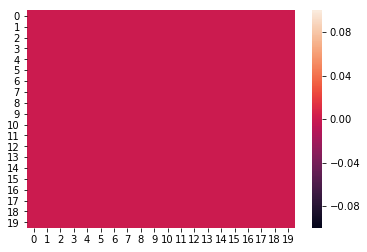

In [94]:
#plot heatmap

#small region(20*20) can't see anything
sns.heatmap(plot_z)

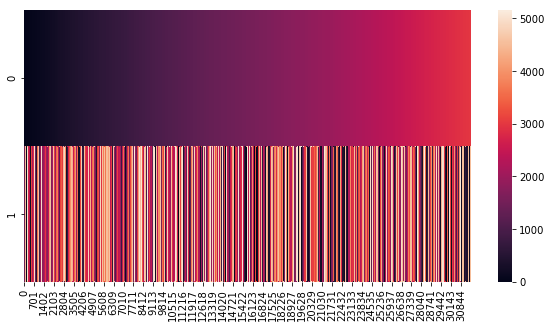

In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(df_counts.nonzero())

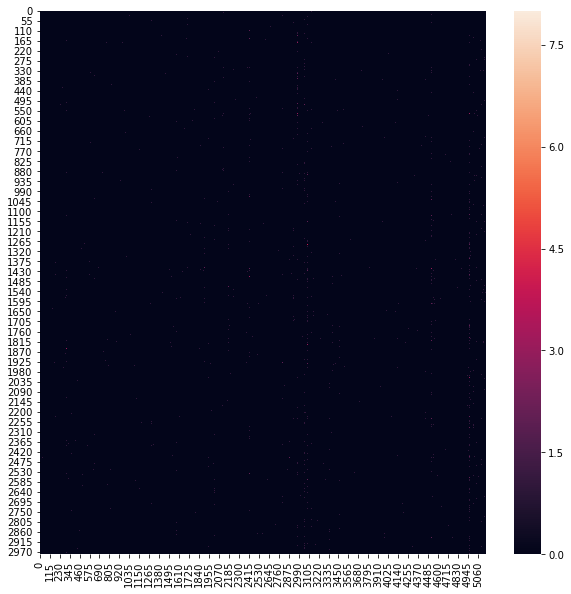

In [96]:
# plt all dataset
plt.figure(figsize=(10,10))
ax=sns.heatmap(df_counts.toarray())

## Dimensionality Reduction

In [97]:
from sklearn.decomposition import PCA

In [98]:
df_reduced = PCA(n_components=2).fit_transform(df_counts.toarray())

In [99]:
df_reduced.shape

(2983, 2)

In [100]:
df_reduced

array([[ 0.52403895,  0.28721194],
       [-0.89836917, -0.3605879 ],
       [ 0.01536224, -0.66712724],
       ..., 
       [-0.50167685,  0.413461  ],
       [ 0.49819501,  0.3675445 ],
       [ 2.33191547, -0.47564364]])

In [101]:
df_reduced[0:5,0:2]

array([[ 0.52403895,  0.28721194],
       [-0.89836917, -0.3605879 ],
       [ 0.01536224, -0.66712724],
       [-0.73752805,  0.00880701],
       [ 0.1303122 , -0.59602468]])

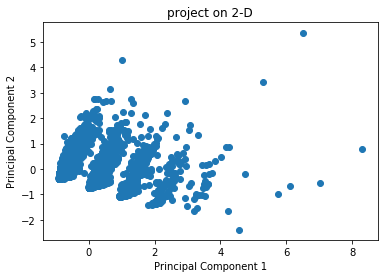

In [102]:
# project on 2D
plt.scatter(x=df_reduced[:,0],y=df_reduced[:,1])
plt.title('project on 2-D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

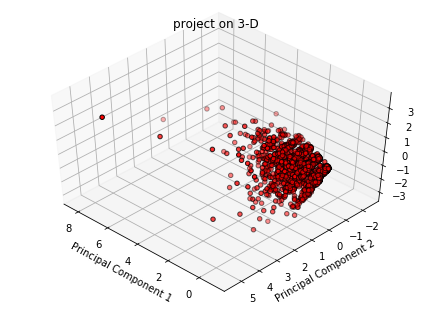

In [103]:
from mpl_toolkits.mplot3d import Axes3D

df_reduced_3d = PCA(n_components=3).fit_transform(df_counts.toarray())
fig = plt.figure(1) #figsize=(4, 3)

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_reduced_3d[:, 0], df_reduced_3d[:, 1], df_reduced_3d[:, 2],  cmap=plt.cm.spectral,
           edgecolor='k',c='r')

plt.title('project on 3-D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [104]:
df_dup.sentance

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
5       I have to jiggle the plug to get it to line up...
6       If you have several dozen or several hundred c...
7             If you are Razr owner...you must have this!
8                     Needless to say, I wasted my money.
9                        What a waste of money and time!.
10                        And the sound quality is great.
11      He was very impressed when going from the orig...
12      If the two were seperated by a mere 5+ ft I st...
13                               Very good quality though
14      The design is very odd, as the ear "clip" is n...
15      Highly recommend for any one who has a blue to...
16                    I advise EVERYONE DO NOT BE FOOLED!
17            

### Doing tf-idf

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_dup.sentance)
tfidf

<2983x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [106]:
tfidf.toarray() 

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [107]:
tfidf.toarray().nonzero()

(array([   0,    0,    0, ..., 2982, 2982, 2982], dtype=int64),
 array([ 647, 1013, 1829, ..., 4630, 4974, 5110], dtype=int64))

In [108]:
df_counts.toarray().nonzero()

(array([   0,    0,    0, ..., 2982, 2982, 2982], dtype=int64),
 array([ 647, 1013, 1829, ..., 4630, 4974, 5110], dtype=int64))

In [109]:
tfidf.toarray().sum()

8696.8414917270184

In [110]:
df_counts.toarray().sum()

33633

### from above anylsis, we can see that use Common Vectorizer and Tf-idf will get same matrix shape, which is reasonable , bcz we are inquiring same docs.
### but when using Tf-idf will re-weight the count features into floating point values suitable for usage by a classifier , i.e. seeing term-frequency, so result matrix's sum will smaller than common vectorizer

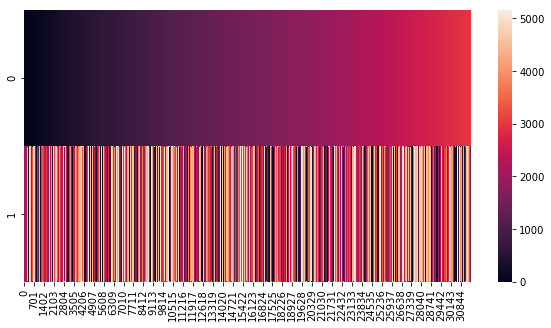

In [111]:
plt.figure(figsize=(10,5))
sns.heatmap(tfidf.nonzero())

## Atrribute Transformation / Aggregation

In [112]:
df_counts.shape

(2983, 5155)

In [115]:
np.sum(df_counts,axis=0)

matrix([[ 1, 36,  3, ...,  1,  2,  1]], dtype=int64)

In [116]:
np.sum(df_counts,axis=0).shape

(1, 5155)

In [117]:
np.sum( df_counts , axis=0 )[10:20]

matrix([], shape=(0, 5155), dtype=int64)

In [118]:
ta.plot_word_frequency([count_vect.get_feature_names(), np.sum(df_counts,axis=0)],"Term Frequency Distribution")

{'data': [{'type': 'bar',
   'x': ['00',
    '10',
    '100',
    '11',
    '12',
    '13',
    '15',
    '15g',
    '15pm',
    '17',
    '18',
    '18th',
    '1928',
    '1947',
    '1948',
    '1949',
    '1971',
    '1973',
    '1979',
    '1980',
    '1986',
    '1995',
    '1998',
    '20',
    '2000',
    '2005',
    '2006',
    '2007',
    '20th',
    '2160',
    '23',
    '24',
    '25',
    '2mp',
    '30',
    '30s',
    '325',
    '35',
    '350',
    '375',
    '3o',
    '40',
    '40min',
    '42',
    '44',
    '45',
    '4s',
    '4ths',
    '50',
    '5020',
    '510',
    '5320',
    '54',
    '5lb',
    '680',
    '70',
    '70000',
    '700w',
    '70s',
    '80',
    '80s',
    '8125',
    '85',
    '8525',
    '8530',
    '8pm',
    '90',
    '95',
    '99',
    'aailiyah',
    'abandoned',
    'abhor',
    'ability',
    'able',
    'abound',
    'about',
    'above',
    'abroad',
    'absolute',
    'absolutel',
    'absolutely',
    'absolutley',
    'abstrus

In [136]:
num_counts=np.sum(df_counts,axis=0)
num_counts[:,:30]

matrix([[ 1, 36,  3,  2,  4,  3,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  9,  1,  2,  1,  1,  2,  1]], dtype=int64)

In [135]:
#after sorting num of count

num_counts.sort()

pd.DataFrame(num_counts)

,0,1,2,3,4,5,6,7,8,9,...,5145,5146,5147,5148,5149,5150,5151,5152,5153,5154
0,1,1,1,1,1,1,1,1,1,1,...,334,400,570,624,638,669,752,789,1138,1951


### from above dataframe we can see the most frequency word's number is "1951"

In [174]:
#find which index's number is 1951
for ind in range(num_counts.shape[1]):
    if num_counts[0,ind]==1951:
        print(ind)

4531


In [175]:
#find that index's word 
count_vect.get_feature_names()[4531]

'the'

### the result is "the" is the most frequency word in the dataset which is reasonable!

In [131]:
%matplotlib inline

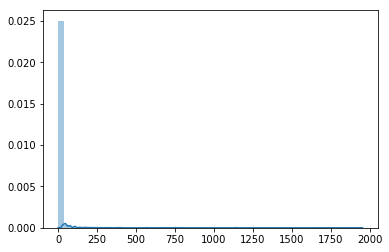

In [130]:
# I can't see full picture of distribution............why?
# maybe out of boundary ? I need figure out later on.
sns.distplot(num_counts.T)

In [187]:
num_counts

matrix([[ 1, 36,  3, ...,  1,  2,  1]], dtype=int64)

## Discretization and Binarization

In [176]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [177]:
mlb = preprocessing.LabelBinarizer()

In [178]:
mlb.fit(df_dup.label)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [179]:
mlb.classes_

array([0, 1], dtype=int64)

In [181]:
df_dup['bin_label'] =mlb.transform(df_dup['label']).tolist()

C:\Users\icmems\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [182]:
df_dup.head(10)

,sentance,label,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0]


## Conclusion
  Through this data mining process ,I learn a lot about text-mining process. I have some experience about data mining experience but all about time-series data,so this text-mining process still have some challange for me, though some process are the same. 
  Comparinng dealing with time-series and text-mining data,I think most difference is text data are far more sparse,bcz docs data contain so much more words,but these words may or may not correlation each other, but in my small opinon, time series data are much more relate each other. 
  Beside,docs contain some white-spaces or punctuation ,when separate them , it may be go wrong in some way , I had encounter these problem during this assignment. 
  Least but not last, I think data mining has a lot of fun to do, and text-minig topic is a challange but useful topic for us to learn.